In [1]:
#################### KNN ####################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



#################### Hyperparameters
K = 3
train_rate = 0.8
test_rate = 0.2



#################### Loading Dataset and Preprocessing
df = pd.read_csv("data/dataset.txt", header=None)
data = np.array(df)
M,N = np.shape(data)


def normalisation(data):
    M = np.max(data, axis=0)
    m = np.min(data, axis=0)
    out = (data-m) / (M-m)
    return out


def standardisation(data):
    m = data.mean
    out = (data - np.mean(data, axis=0))/ np.std(data, axis=0)
    return out



target = data[:, -1]
data = standardisation(data[:, :-1])
data = np.column_stack((data, target))


In [2]:
#################### Train-Test-Validation Split

M_train = int(np.ceil(M * train_rate))
M_test = M - M_train
idx = np.random.permutation(M)
train_idx = idx[:M_train]
test_idx = idx[M_train:]

data_train = data[train_idx, :]
data_test = data[test_idx, :]


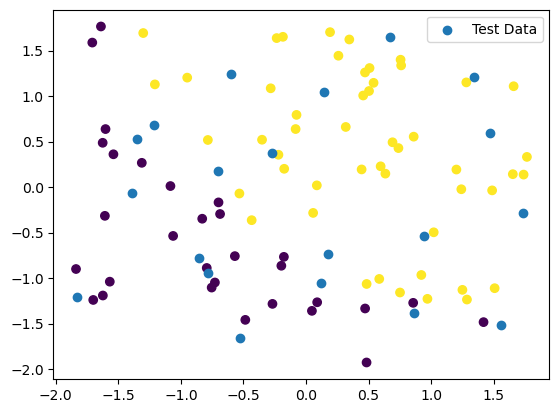

In [8]:
plt.scatter(data_train[:, 0], data_train[:, 1], c=data_train[:,2])
plt.scatter(data_test[:, 0], data_test[:, 1], label="Test Data")
plt.legend()
plt.show()

In [11]:
#################### Linear Regression Model (Regression)

def distance(X, x):
    s = np.sum((X[:, :-1] - x)**2, axis=1)
    s2 = np.sqrt(s)
    out = np.argsort(s2)
    return out



def avg(Y):
    return np.mean(Y)
    
    

predicts = np.array([])

for x in data_test:
    D = distance(data_train,x[:-1])
    nighbors_indices = D[:K].flatten()
    neighbors = data_train[nighbors_indices, -1]
    v = avg(neighbors)
    predicts = np.append(predicts, v)
    
 

In [12]:
#################### Linear Regression Model (Classification)

def distance(X, x):
    s = np.sum((X[:, :-1] - x)**2, axis=1)
    s2 = np.sqrt(s)
    out = np.argsort(s2)
    return out


def majority_vote(Y):
    vote = np.bincount(Y).argmax()
    return vote

    
    

predicts = np.array([])

for x in data_test:
    D = distance(data_train,x[:-1])
    nighbors_indices = D[:K].flatten()
    neighbors = data_train[nighbors_indices, -1]
    v = majority_vote(neighbors.astype(int))
    predicts = np.append(predicts, v)
    
 